# Titanic Project

 The Titanic dataset is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape   #checking te data dimensiion

(891, 12)

In [4]:
df.dtypes   #checking the data types of each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Visualization of the data

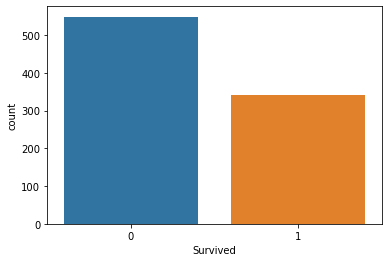

In [6]:
sns.countplot(x='Survived',data=df)
plt.show()

Here we can see that majority of the people from the titanic ship are not able to survive from that disaster.

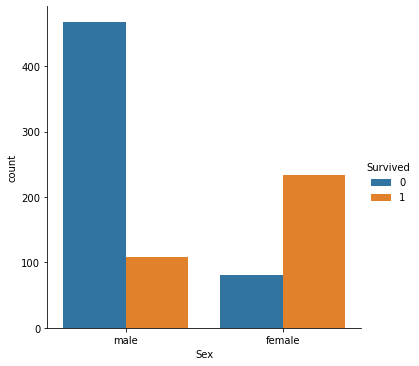

In [7]:
sns.catplot(x ="Sex", hue ="Survived",  kind ="count", data = df) 

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%.



<AxesSubplot:xlabel='Sex', ylabel='Age'>

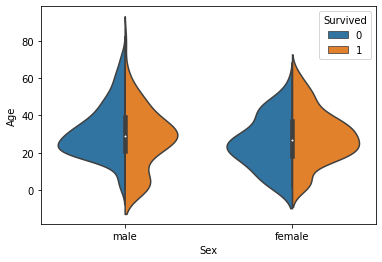

In [8]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  data = df, split = True) 

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

>Good for children.

>High for women in the age range 20-50.

>Less for men as the age increases.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

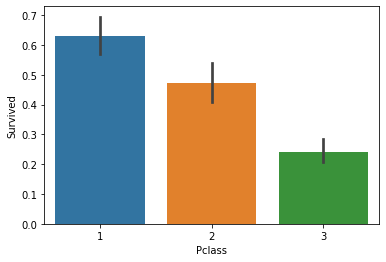

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df)


Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

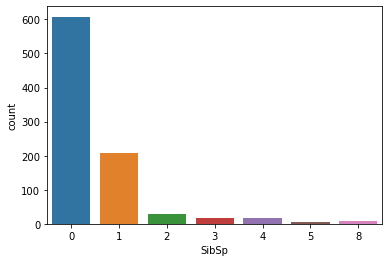

In [10]:
sns.countplot(x='SibSp',data=df)
plt.show()

Here we can see clearly that Maximum passengers onboard Titanic, were not with their sibling or spouse.

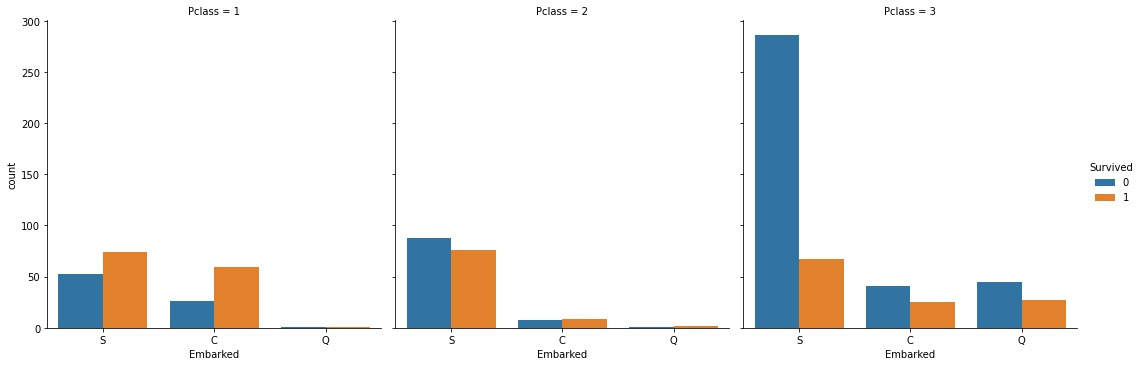

In [11]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df) 

Some notable observations are:

>Majority of the passengers boarded from S. So, the missing values can be filled with S.

>Majority of class 3 passengers boarded from Q.

>S looks lucky for class 1 and 2 passengers compared to class 3.

In [12]:
# Total number of passengers
no_of_passengers = df.groupby("Survived").size()
no_of_passengers

Survived
0    549
1    342
dtype: int64

In [13]:
# Total number of survivors
no_of_survivors = no_of_passengers[1]
no_of_survivors

342

In [14]:
# Total number of deaths
no_of_deaths = no_of_passengers[0]
no_of_deaths

549

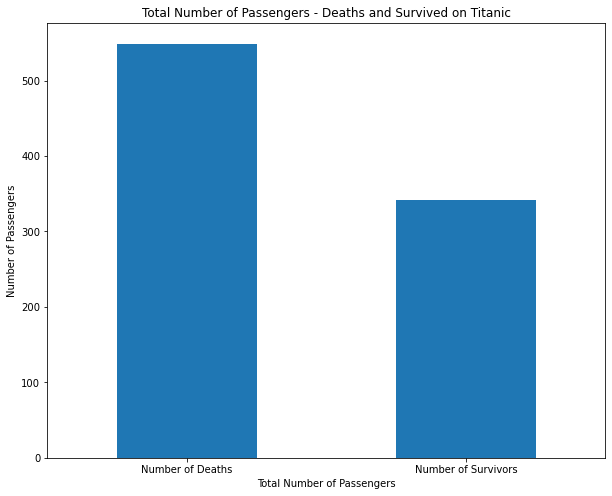

In [15]:
objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
no_of_passengers.plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.show()

In [16]:
df['Embarked'] = df['Embarked'].replace(np.nan,'S')

In [17]:
#checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
#checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
df['Age'] = df['Age'].fillna(df['Age'].median())

177 values out of 891 values are missing or NaN fot the column "Age". So the  NaN values are replaced by the median of the column.

In [20]:
#checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

As 687 rows in the cabin column are missing from 891 rows. So most of the data are missing from the cabin column. So we have to drop the column as their is no point to replace the NaN values with median  or mean.

In [21]:
#dropping the cabin column
df=df.drop('Cabin', axis=1)

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [23]:
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.0,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.0,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,28.0,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.0,0,0,8.0,30.0000,0.0


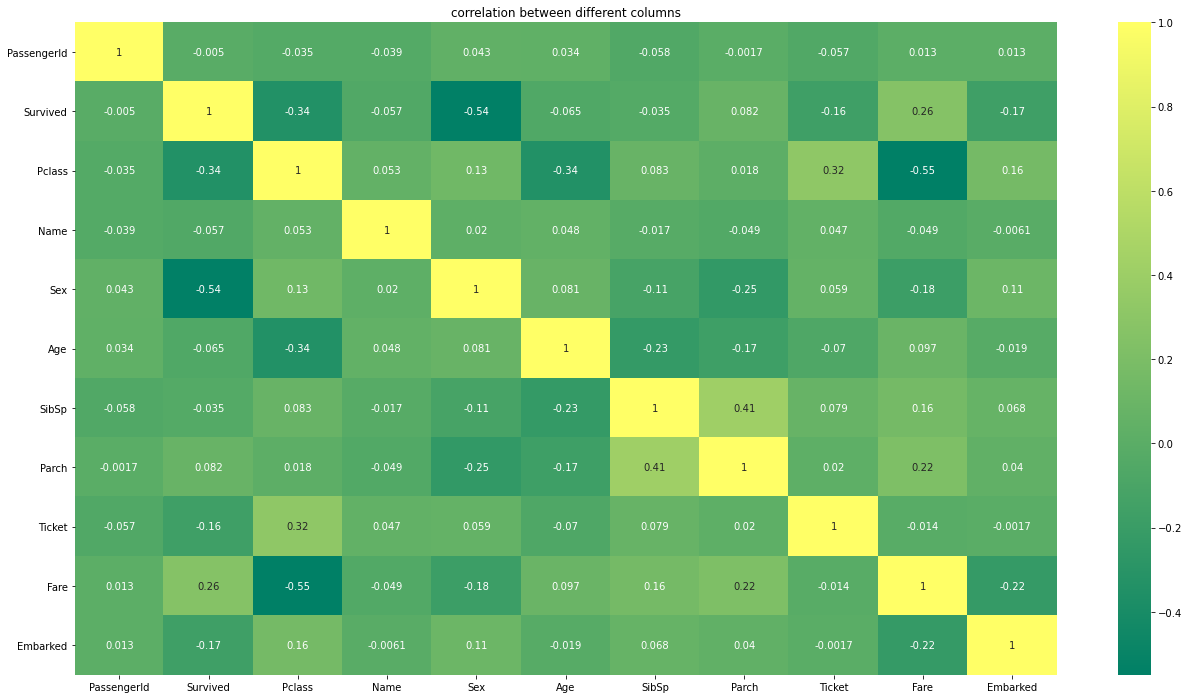

In [25]:
#checking which column is highly correlated to the target column i.e. 'Survived'
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="summer",annot=True)
plt.title('correlation between different columns')
plt.show()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Ticket'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

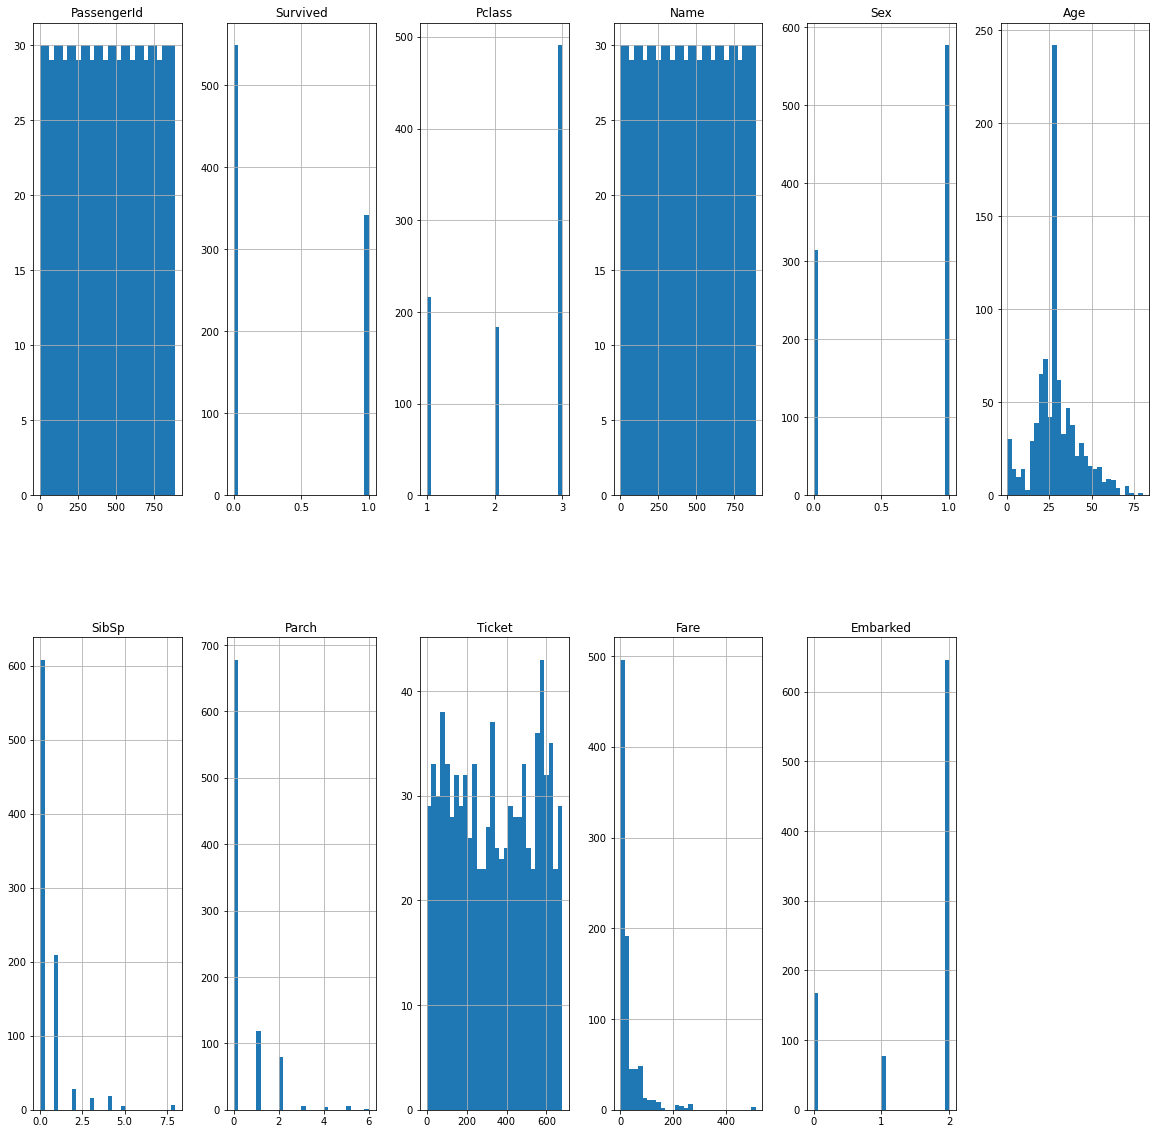

In [26]:
#'''Histogram : to see the numeric data distribution'''
df.hist(figsize=(20,20), grid = True, layout = (2,6), bins = 30)

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.361582,0.523008,0.381594,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


In [28]:
#checking the skewness in the data
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

As most of the columns have categorical type of data so we don't have to remove skewness and outliers from the data. 

In [29]:
df['Fare']=np.cbrt(df['Fare'])

As 'Fare' is the only column in the dataset that has continous data and skewness present in the data. So we have to remove it.

In [30]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           1.230382
Embarked      -1.264823
dtype: float64

<AxesSubplot:ylabel='Frequency'>

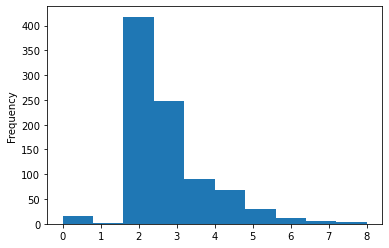

In [31]:
df['Fare'].plot.hist()

Checking outliers

As 'Age' and 'Fare' is the only columns which have continous type of data, so we are checking outliers in both the columns.

<AxesSubplot:>

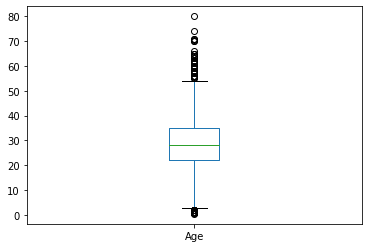

In [32]:
df['Age'].plot.box()

<AxesSubplot:>

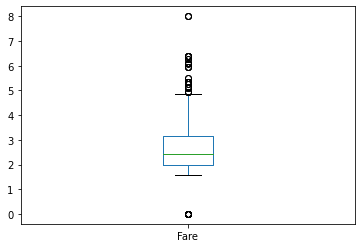

In [33]:
df['Fare'].plot.box()

>We don't have to remove outliers from the Age column as it might be possible that the person is of old age as the hightest value is '80'.

>Fare column doesn't have the outliers as the fare is dependent on the class as different class have different fare and fare is also dependent on the services taken by the person.

In [34]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('Survived', axis=1)
y=df['Survived']

In [35]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108.0,1.0,22.0,1,0,523.0,1.935438,2.0
1,2,1,190.0,0.0,38.0,1,0,596.0,4.146318,0.0
2,3,3,353.0,0.0,26.0,0,0,669.0,1.993730,2.0
3,4,1,272.0,0.0,35.0,1,0,49.0,3.758647,2.0
4,5,3,15.0,1.0,35.0,0,0,472.0,2.004158,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548.0,1.0,27.0,0,0,101.0,2.351335,2.0
887,888,1,303.0,0.0,19.0,0,0,14.0,3.107233,2.0
888,889,3,413.0,0.0,28.0,1,2,675.0,2.862294,2.0
889,890,1,81.0,1.0,26.0,0,0,8.0,3.107233,0.0


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.7921348314606742
At random state 0, the testing accuracy is:- 0.8044692737430168


At random state 1, the training accuracy is:- 0.797752808988764
At random state 1, the testing accuracy is:- 0.770949720670391


At random state 2, the training accuracy is:- 0.800561797752809
At random state 2, the testing accuracy is:- 0.7653631284916201


At random state 3, the training accuracy is:- 0.8089887640449438
At random state 3, the testing accuracy is:- 0.7653631284916201


At random state 4, the training accuracy is:- 0.7949438202247191
At random state 4, the testing accuracy is:- 0.8100558659217877


At random state 5, the training accuracy is:- 0.7879213483146067
At random state 5, the testing accuracy is:- 0.8212290502793296


At random state 6, the training accuracy is:- 0.7808988764044944
At random state 6, the testing accuracy is:- 0.8491620111731844


At random state 7, the training accuracy is:- 0.8103932584269663
At random state 7, th

At random state 63, the training accuracy is:- 0.7907303370786517
At random state 63, the testing accuracy is:- 0.8268156424581006


At random state 64, the training accuracy is:- 0.7935393258426966
At random state 64, the testing accuracy is:- 0.8100558659217877


At random state 65, the training accuracy is:- 0.7949438202247191
At random state 65, the testing accuracy is:- 0.7988826815642458


At random state 66, the training accuracy is:- 0.7991573033707865
At random state 66, the testing accuracy is:- 0.7877094972067039


At random state 67, the training accuracy is:- 0.7865168539325843
At random state 67, the testing accuracy is:- 0.8156424581005587


At random state 68, the training accuracy is:- 0.800561797752809
At random state 68, the testing accuracy is:- 0.7877094972067039


At random state 69, the training accuracy is:- 0.7935393258426966
At random state 69, the testing accuracy is:- 0.8156424581005587


At random state 70, the training accuracy is:- 0.7921348314606742
At r

From the above stats, at random state 6 the testing accuracy and training accuracy is hightest.

Testing the best Random State in different algorithms

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=6)

In [39]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()]

In [40]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8491620111731844
[[105   8]
 [ 19  47]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       113
           1       0.85      0.71      0.78        66

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



accuracy score of SVC() is:
0.6815642458100558
[[108   5]
 [ 52  14]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.79       113
           1       0.74      0.21      0.33        66

    accuracy                           0.68       179
   macro avg       0.71      0.58      0.56       179
weighted avg       0.70      0.68      0.62       179



accuracy score of RandomForestClassifier() is:
0.8603351955307262
[[106   7]
 [ 18  48]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89

Now checking cross validation score to check whether our models are overfitted or underfitted.

In [41]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.7856255100119264


In [42]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.8417927311530977


In [43]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.7398091770761408


In [44]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.6386290879417489


In [45]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.7240286234385789


>As we can see the Minimum difference in accuracy score and cross validation score is for RandomForestClassifier(2) so this is our best model.

>Doing GridSearchCV for getting best parameters for RandomForestClassifier()

In [46]:
#creating parameter list to pass in GridSearchCV
parameters= {'criterion': ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'class_weight': ['balanced', 'balanced_subsample'],}

In [47]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [48]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [49]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt'}

In [50]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [51]:
accuracy_score(GCV_pred,y_test)

0.8715083798882681

In [52]:
joblib.dump(GCV.best_estimator_,'Titanic_project.obj')

['Titanic_project.obj']